# Week 12 Handson - Assignment/Project 2: Regression #02

As the previous assignment, the objective of this project is to explore your capability as data analyst. You are challenged to implement data mining methods, given a raw dataset. Then, you need to propose several regression methods for the data, analyze and evaluate it. 

Basic tasks you need to perform in this project: (Note: you can add additional tasks that you think necessary for this project)

1.	Build regression models to predict the price for second hand cars. This step should include EDA, pre-processing, creating model and evaluation. You may use several regression methods, do benchmarking, employ additional techniques, such as ensemble method, to improve the prediction accuracy, etc.
2.	Please use the most appropriate evaluation metrics for this regression project.

Deadline: 17 November 2020, 11:59 a.m. 
 
Deliverables: 
1. Jupyter notebook (your code)
2.	Presentation <br>
**Nb**: In the end of slide and report, please write members’ names and their own contribution during this project.

## Read dataset

In [28]:
import pandas as pd

df = pd.read_csv('data.csv')
print('Shape:', df.shape)
df.head()

# credit to prev. year DSDM students: Felix Septianus Darmawan, Maulana Akmal, Steven Sukma limanus, Ricky Kennedy

Shape: (36575, 20)


,Tahun,Kapasitas mesin,Warna,Tipe bodi,Varian,STATE,Merek,Transmisi,Model,Fitur tambahan,Nama Bursa Mobil,Tipe bahan bakar,Tipe Penjual,CITY,COUNTRY,Jarak tempuh,phone,Sistem Penggerak,price,NEIGHBOURHOOD
0,2008,>1.500 - 2.000 cc,Abu-abu,Pick-up,G Luxury,Jawa Barat,Toyota,Automatic,Innova,"['Sensor Parkir', 'Electric Window']",NaN,Bensin,Individu,Bandung Kota,Indonesia,120.000-125.000,6.282282e+12,Rear Wheel Drive (RWD),125000000,Bojongloa Kidul
1,2018,>1.000 - 1.500 cc,Silver,Hatchback,E CVT,Jakarta D.K.I.,Honda,Automatic,HR-V,"['Airbag', 'Bluetooth Audio', 'Electric Window...",Bursa Mobil Blok M Square,Bensin,Diler,Jakarta Selatan,Indonesia,10.000-15.000,6.289655e+12,4X2,240000000,Kebayoran Baru
2,2017,>1.000 - 1.500 cc,Putih,Hatchback,Panca T,Sumatra Selatan,Datsun,Manual,Go,"['Airbag', 'Electric Window', 'Sensor Parkir']",NaN,Bensin,Diler,Palembang Kota,Indonesia,15.000-20.000,6.281279e+12,Front Wheel Drive (FWD),80000000,Kemuning
3,2013,>1.000 - 1.500 cc,Silver,NaN,E,Jawa Timur,Honda,Automatic,Freed,NaN,NaN,Bensin,NaN,Surabaya Kota,Indonesia,85.000-90.000,6.283832e+12,NaN,170000000,Gubeng
4,2016,>1.000 - 1.500 cc,Putih,MPV,GL Sporty,Jakarta D.K.I.,Suzuki,Manual,Ertiga,"['Airbag', 'Electric Window', 'Sensor Parkir']",Bursa Mobil MGK Kemayoran,Bensin,Diler,Jakarta Pusat,Indonesia,60.000-65.000,6.281912e+12,4X2,125000000,Kemayoran


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split 
import ast 
import warnings
warnings.simplefilter("ignore")

# EDA

In [30]:
# Show null or NaN values
df.isnull().sum()

Tahun                   0
Kapasitas mesin      4383
Warna                   0
Tipe bodi            5589
Varian               1586
STATE                   0
Merek                   0
Transmisi               0
Model                   0
Fitur tambahan      11660
Nama Bursa Mobil    31616
Tipe bahan bakar        0
Tipe Penjual         6434
CITY                    0
COUNTRY                 0
Jarak tempuh            0
phone                2532
Sistem Penggerak     7793
price                   0
NEIGHBOURHOOD           2
dtype: int64

In [31]:
df['Tahun'] = df['Tahun'].apply(lambda x: 1985 if x=='<1986' else x)
df['Tahun'] = df['Tahun'].astype('float32')
df.columns

Index(['Tahun', 'Kapasitas mesin', 'Warna', 'Tipe bodi', 'Varian', 'STATE',
       'Merek', 'Transmisi', 'Model', 'Fitur tambahan', 'Nama Bursa Mobil',
       'Tipe bahan bakar', 'Tipe Penjual', 'CITY', 'COUNTRY', 'Jarak tempuh',
       'phone', 'Sistem Penggerak', 'price', 'NEIGHBOURHOOD'],
      dtype='object')

In [32]:
df_drop = df.copy()
df_drop.drop_duplicates(keep="first", inplace = True) 
print("Duplicated Counts : ",len(df) - len(df_drop))

Duplicated Counts :  76


In [33]:
def barchart(name_column,df_input,size=10) :
    list_name = df_input[name_column].value_counts().index.tolist()
    list_count = df_input[name_column].value_counts()
    plt.figure(figsize=(size, 3))
    plt.bar(list_name, list_count, align='center',width=0.5)
    plt.title(name_column)
    plt.xlabel('Column Name')
    plt.ylabel('Count')
    plt.show()

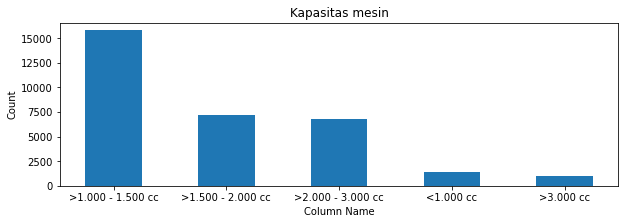

None

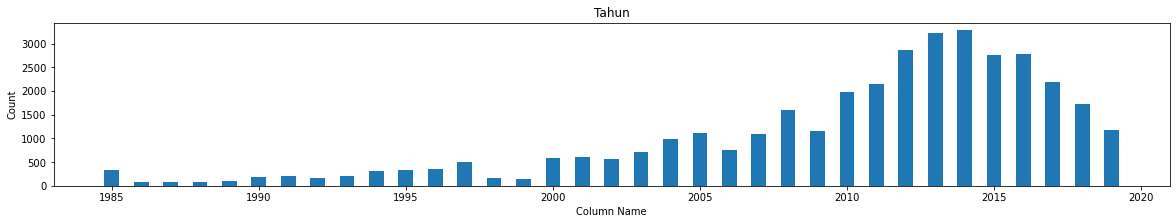

None

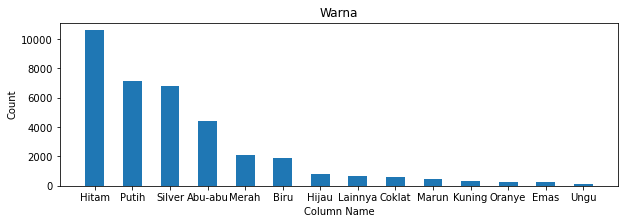

None

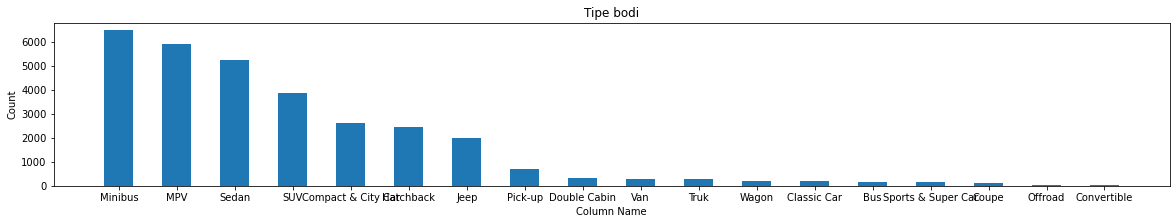

None

Lain-lain    6127
G            4569
E            1912
S             842
GX            636
             ... 
ZL              1
L4 1.4          1
G G             1
2.7             1
High            1
Name: Varian, Length: 774, dtype: int64

Jakarta D.K.I.         9049
Jawa Barat             6928
Jawa Timur             5243
Jawa Tengah            3025
Banten                 3005
Yogyakarta D.I.        1361
Sumatra Utara          1358
Bali                   1224
Sumatra Selatan         935
Riau                    757
Sulawesi Selatan        597
Lampung                 592
Kalimantan Selatan      567
Sumatra Barat           536
Kalimantan Timur        328
Aceh D.I.               244
Kalimantan Barat        231
Kepulauan Riau          163
Jambi                   136
Nusa Tenggara Barat      92
Bangka Belitung          67
Kalimantan Tengah        37
Sulawesi Utara           29
Bengkulu                 18
Sulawesi Tengah          17
Sulawesi Tenggara        17
Nusa Tenggara Timur       6
Papua                     5
Sulawesi Barat            3
Maluku                    2
Gorontalo                 2
Kalimantan Utara          1
Name: STATE, dtype: int64

Toyota                   12152
Honda                     6603
Daihatsu                  3691
Suzuki                    3191
Nissan                    2412
Mitsubishi                2208
Mercedes-Benz              990
BMW                        713
Isuzu                      589
Mazda                      578
Chevrolet                  563
Hyundai                    505
Ford                       428
KIA                        417
Datsun                     269
Jeep                       165
Volkswagen                 115
Lexus                       98
Peugeot                     90
Land Rover                  88
Wuling                      72
Mini Cooper                 70
Proton                      66
Timor                       61
Porsche                     57
Hino                        51
Audi                        44
Volvo                       38
Opel                        29
Klasik dan Antik            23
Lain-lain                   23
Chery                       17
Subaru  

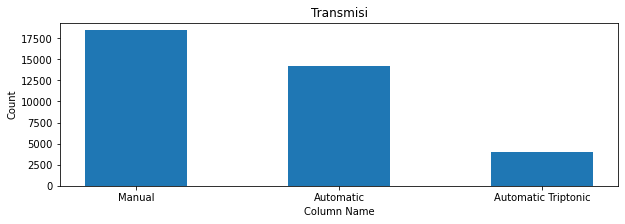

None

Avanza       2538
Innova       2231
Jazz         1358
Xenia        1169
CR-V         1086
             ... 
Kluger          1
Audi A8         1
Crossroad       1
Premacy         1
Succed          1
Name: Model, Length: 451, dtype: int64

['Electric Window']                                                                                             1287
['Jok kulit']                                                                                                   1222
['Airbag', 'Bluetooth Audio', 'Electric Window', 'Sensor Parkir']                                               1042
['Airbag', 'Electric Window', 'Sensor Parkir']                                                                   987
['Airbag', 'Bluetooth Audio', 'Electric Window', 'Jok kulit', 'Sensor Parkir']                                   813
                                                                                                                ... 
['Moonroof', 'GPS', 'Airbag', 'Electric Window', 'Sensor Parkir', 'Sunroof', 'Bluetooth Audio', 'Jok kulit']       1
['Electric Window', 'Jok kulit', 'Bluetooth Audio', 'Sensor Parkir']                                               1
['Sensor Parkir', 'Electric Window', 'Jok kulit', 'Kamera Belaka

Bursa Mobil WTC Mangga Dua          745
Bursa Otomotif Sunter               670
Bursa Mobil Summarecon Serpong      435
Bursa Mobil Mangga Dua Square       403
Bursa Mobil DTC                     361
Bursa Mobil Bintaro                 347
Bursa Gading Auto Center            273
Pasar Mobil Kemayoran               248
Bursa Mobil Karawaci                202
Bursa Mobil POSH Bekasi             177
Bursa Mobil BG Junction Surabaya    166
Bursa Mobil MGK Kemayoran           163
Bursa Mobil Blok M Square           131
Carsentro Yogyakarta                126
Carsentro Solo                       96
Carsentro Semarang                   92
Carsentro Makassar                   81
Bursa Mobil Kelapa Gading            77
Bursa Mobil Lenmarc Surabaya         75
Bursa Mobil Permata Hijau            68
Bursa Mobil Blok M Plaza             23
Name: Nama Bursa Mobil, dtype: int64

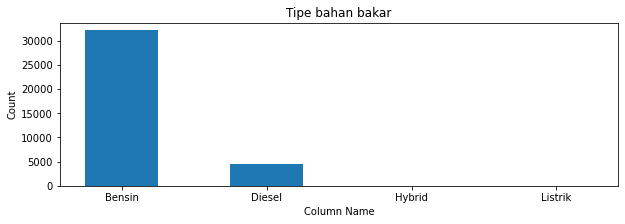

None

Bensin     32093
Diesel      4443
Hybrid        32
Listrik        7
Name: Tipe bahan bakar, dtype: int64

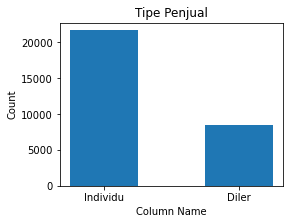

None

Individu    21656
Diler        8485
Name: Tipe Penjual, dtype: int64

Jakarta Selatan         2573
Surabaya Kota           2514
Jakarta Timur           2191
Bandung Kota            2082
Jakarta Utara           1756
                        ... 
Kapuas Hulu Kab.           1
Gorontalo Utara Kab.       1
Bima Kota                  1
Lampung Barat Kab.         1
Aceh Timur Kab.            1
Name: CITY, Length: 321, dtype: int64

Indonesia    36575
Name: COUNTRY, dtype: int64

0-5.000            1606
40.000-45.000      1279
50.000-55.000      1237
25.000-30.000      1226
100.000-105.000    1200
                   ... 
255.000-260.000      20
265.000-270.000      19
290.000-295.000      18
285.000-290.000       6
>300.000              1
Name: Jarak tempuh, Length: 61, dtype: int64

6.285219e+12    132
6.287712e+12     90
6.282114e+12     86
6.281908e+12     74
6.287782e+12     66
               ... 
6.285648e+12      1
6.285711e+12      1
6.281357e+12      1
6.281212e+11      1
6.281617e+12      1
Name: phone, Length: 19837, dtype: int64

4X2                        13479
Front Wheel Drive (FWD)     8570
Rear Wheel Drive (RWD)      4244
All Wheel Drive (AWD)       1273
4X4                         1216
Name: Sistem Penggerak, dtype: int64

Pademangan        837
Duren Sawit       781
Gubeng            582
Kebayoran Baru    545
Kelapa Gading     516
                 ... 
Siulak Mukai        1
Kedondong           1
Pasar Manna         1
Jiput               1
Gumelar             1
Name: NEIGHBOURHOOD, Length: 1867, dtype: int64

In [34]:
display(barchart('Kapasitas mesin',df))
display(barchart('Tahun',df,20))
display(barchart('Warna',df))
display(barchart('Tipe bodi',df,20))
display(df['Varian'].value_counts())
display(df['STATE'].value_counts())
display(df['Merek'].value_counts())
display(barchart('Transmisi',df,10))
display(df['Model'].value_counts())
display(df['Fitur tambahan'].value_counts())
display(df['Nama Bursa Mobil'].value_counts())
display(barchart('Tipe bahan bakar',df,10))
display(df['Tipe bahan bakar'].value_counts())
display(barchart('Tipe Penjual',df,4))
display(df['Tipe Penjual'].value_counts())
display(df['CITY'].value_counts())
display(df['COUNTRY'].value_counts())
display(df['Jarak tempuh'].value_counts())
display(df['phone'].value_counts())
display(df['Sistem Penggerak'].value_counts())
display(df['NEIGHBOURHOOD'].value_counts())

In [35]:
df.corr()

,Tahun,phone,price
Tahun,1.000000,-0.034172,0.116330
phone,-0.034172,1.000000,-0.019518
price,0.116330,-0.019518,1.000000


,Tahun,Kapasitas mesin,Warna,Tipe bodi,Varian,STATE,Merek,Transmisi,Model,Fitur tambahan,Nama Bursa Mobil,Tipe bahan bakar,Tipe Penjual,CITY,COUNTRY,Jarak tempuh,phone,Sistem Penggerak,price,NEIGHBOURHOOD
0,2008.0,>1.500 - 2.000 cc,Abu-abu,Pick-up,G Luxury,Jawa Barat,Toyota,Automatic,Innova,"['Sensor Parkir', 'Electric Window']",NaN,Bensin,Individu,Bandung Kota,Indonesia,120.000-125.000,6.282282e+12,Rear Wheel Drive (RWD),125000000,Bojongloa Kidul
1,2018.0,>1.000 - 1.500 cc,Silver,Hatchback,E CVT,Jakarta D.K.I.,Honda,Automatic,HR-V,"['Airbag', 'Bluetooth Audio', 'Electric Window...",Bursa Mobil Blok M Square,Bensin,Diler,Jakarta Selatan,Indonesia,10.000-15.000,6.289655e+12,4X2,240000000,Kebayoran Baru
2,2017.0,>1.000 - 1.500 cc,Putih,Hatchback,Panca T,Sumatra Selatan,Datsun,Manual,Go,"['Airbag', 'Electric Window', 'Sensor Parkir']",NaN,Bensin,Diler,Palembang Kota,Indonesia,15.000-20.000,6.281279e+12,Front Wheel Drive (FWD),80000000,Kemuning
3,2013.0,>1.000 - 1.500 cc,Silver,NaN,E,Jawa Timur,Honda,Automatic,Freed,NaN,NaN,Bensin,NaN,Surabaya Kota,Indonesia,85.000-90.000,6.283832e+12,NaN,170000000,Gubeng
4,2016.0,>1.000 - 1.500 cc,Putih,MPV,GL Sporty,Jakarta D.K.I.,Suzuki,Manual,Ertiga,"['Airbag', 'Electric Window', 'Sensor Parkir']",Bursa Mobil MGK Kemayoran,Bensin,Diler,Jakarta Pusat,Indonesia,60.000-65.000,6.281912e+12,4X2,125000000,Kemayoran
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36570,2005.0,>1.500 - 2.000 cc,Silver,NaN,G,Bali,Toyota,Manual,Innova,NaN,Bursa Otomotif Sunter,Bensin,Diler,Denpasar Kota,Indonesia,105.000-110.000,6.281999e+12,NaN,98000000,Denpasar Utara
36571,1996.0,>2.000 - 3.000 cc,Biru,Sedan,E230,Jawa Timur,Mercedes-Benz,Manual,E-Class,[],NaN,Bensin,Diler,Surabaya Kota,Indonesia,145.000-150.000,6.281336e+12,NaN,68000000,Karangpilang
36572,2012.0,>1.000 - 1.500 cc,Putih,SUV,Lain-lain,Jawa Timur,Nissan,Manual,Grand livina,"['Electric Window', 'Jok kulit']",NaN,Bensin,Individu,Malang Kota,Indonesia,105.000-110.000,6.282148e+12,4X2,114000000,Kedungkandang
36573,2007.0,>1.000 - 1.500 cc,Biru,Pick-up,Lain-lain,Jakarta D.K.I.,Suzuki,Manual,Lain-lain,NaN,NaN,Bensin,NaN,Jakarta Barat,Indonesia,165.000-170.000,6.281211e+12,Rear Wheel Drive (RWD),43000000,Kebon Jeruk


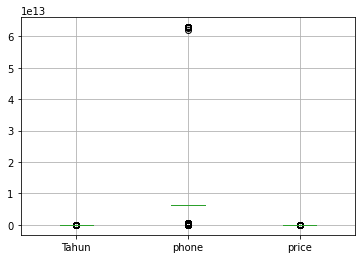

In [36]:
display(df)

boxplot = df.boxplot()

In [37]:
list_name_column = ['Tahun',
 'Kapasitas mesin',
 'Warna',
 'Tipe bodi',
 'Varian',
 'STATE',
 'Merek',
 'Transmisi',
 'Model',
 'Fitur tambahan',
 'Nama Bursa Mobil',
 'Tipe bahan bakar',
 'Tipe Penjual',
 'CITY',
 'Jarak tempuh',
 'Sistem Penggerak',
 'price',
 'NEIGHBOURHOOD']

In [38]:
## Utils

# Duplicated
def delete_duplicated(df_input) :
    df_input.drop_duplicates(keep = "first", inplace = True) 
    return df_input


# Unused Column
def delete_unused_column(df_input, name_column) :
    if (name_column in df_input) :
        return df_input.drop([name_column], axis=1)
    else :
        return df_input
    

# Handle Null, exception for 'Fitur tambahan'

# Remove 
def remove_null(df_input,name_column) :
    df_input = df_input.dropna(axis=0, subset=[name_column])
    return df_input


# Replace
def replace_null(df_input,name_column,value_replace) :
    df_input[name_column] = df_input[name_column].replace(np.nan, value_replace)
    return df_input


# 'Fitur tambahan'
def replace_empty_array(df_input) :
    name_column = 'Fitur tambahan'
    for row in df_input.loc[df_input[name_column].isnull(), name_column].index:
        df_input.at[row, name_column] = '[]' 
    return df_input

# Encoding, exception for 'Fitur tambahan'
def one_hot_encoding(df_input, name_column) :
    if (name_column in df_input) :
        name_host_column = "C" + str(list_name_column.index(name_column))
        list_value = df_input[name_column].unique().tolist()
        for i in range(0, len(list_value)) :
            name_path_column = name_host_column + "-" + str(i)
            df_input[name_path_column] = np.where(df_input[name_column] == list_value[i], 1, 0)
        df_input = delete_unused_column(df_input, name_column)
        return df_input
    else :
        return df_input
    
    
def numerical_coding(df_input,name_column) :
    if (name_column in df_input) :
        name_host_column = "C" + str(list_name_column.index(name_column))
        list_value = df_input[name_column].unique().tolist()
        df_input[name_host_column] = df_input[name_column].apply(lambda row: list_value.index(row) + 1)
        df_input = delete_unused_column(df_input, name_column)
        return df_input
    else :
        return df_input

    
def one_hot_encoding_array(df_input) :
    name_column = 'Fitur tambahan'
    if (name_column in df_input) :
        set_feature = set()
        for i,item in enumerate(df_input[name_column]) :
            current_lst_feature = ast.literal_eval(item) 
            current_set_feature = set(current_lst_feature)
            set_feature = set_feature.union(current_set_feature)

        lst_feature = list(set_feature)
        name_host_column = "C" + str(list_name_column.index(name_column))
        for i in range(0, len(lst_feature)) :
            name_path_column = name_host_column + "-" + str(i)

            lst_one_hot = []
            for item in df_input[name_column] :
                current_lst_feature = ast.literal_eval(item)
                val = 0
                if (lst_feature[i] in current_lst_feature) :
                    val = 1
                lst_one_hot.append(val)
            df_input[name_path_column] = lst_one_hot   
            
        df_input = delete_unused_column(df_input, name_column)
        return df_input
    else :
        return df_input    

# Fix Preprocessing

In [39]:
df_preprocess = df.copy()
df_preprocess = delete_duplicated(df_preprocess)
df_preprocess = delete_unused_column(df_preprocess, 'COUNTRY')
df_preprocess = delete_unused_column(df_preprocess, 'phone')
print('Shape:', df_preprocess.shape)

Shape: (36499, 18)


# Create Schema

In [40]:
list_null_column = [
    'Kapasitas mesin',
    'Tipe bodi',
    'Varian',
    'Nama Bursa Mobil',
    'Tipe Penjual',
    'Sistem Penggerak',
    'NEIGHBOURHOOD'
]

In [41]:
list_encoding_column = [
    'Kapasitas mesin',
    'Tahun',
    'Warna',
    'Tipe bodi',
    'Varian',
    'Jarak tempuh',
    'Nama Bursa Mobil',
    'STATE',
    'Merek',
    'Transmisi',
    'Model',
    'Tipe bahan bakar',
    'Tipe Penjual',
    'CITY',
    'Sistem Penggerak',
    'NEIGHBOURHOOD'
]
len(list_encoding_column)

16

In [42]:
def Schema(df_input, list_handle_null, list_encoding) :
    # Handle Null
    for idx, name_column in enumerate(list_null_column) :
        if (list_handle_null[idx] == True) :
            df_input = remove_null(df_input,name_column)
        else :
            df_input = replace_null(df_input,name_column,'unknown')
    
    # 'Fitur Tambahan'
    df_input = replace_empty_array(df_input)

    # Encoding
    for idx, name_column in enumerate(list_encoding_column) :
        if (list_encoding[idx] == True) :
            df_input = one_hot_encoding(df_input,name_column)
        elif (list_encoding[idx] == False):
            df_input = numerical_coding(df_input,name_column)
        elif(list_encoding[idx] is None):
            df_input[name_column] = df_input[name_column].apply(lambda x: 0)
        else:
            pass
    
    # 'Fitur Tambahan'
    df_input = one_hot_encoding_array(df_input)
  
    return df_input

In [43]:
df_schema = df_preprocess.copy()
list_schema = []

df_schema_1 = Schema(df_schema, 
                     [True,False,False,False,False,False,False] , 
                     [True,True,False,False,False,False,False,False,
                     False,False,False,False,False,False,False,False
                     ])
list_schema.append(df_schema_1)

df_schema_2 = Schema(df_schema, 
                     [True,True,True,False,False,False,False] , 
                     [True,True,True,False,False,False,False,False,
                     False,False,False,False,False,False,False,False
                     ])
list_schema.append(df_schema_2)

#Sama kaya 2, cuma yearnya dijadiin nornmal

df_schema_3 = Schema(df_schema, 
                     [True,True,True,False,False,False,False] , 
                     [True,2,True,False,False,False,False,False,
                     False,False,False,False,False,False,False,False
                     ])
list_schema.append(df_schema_3)

In [44]:

df_schema_4 = Schema(df_schema, 
                     [True,True,True,False,False,False,False] , 
                     [True,2,True,False,None,False,False,False,
                      False,False,False,False,False,None,False,None
                     ])
list_schema.append(df_schema_4)

df_schema_5 = Schema(df_schema, 
                     [True,True,True,False,False,False,False] , 
                     [True,2,True,False,None,False,None,False,False,
                      False,False,False,False,None,False,None
                     ])
list_schema.append(df_schema_5)

df_schema_6 = Schema(df_schema, 
                     [True,True,True,False,False,False,False] , 
                     [True,2,True,False,None,False,None,None,False,
                      False,False,False,False,None,False,None
                     ])
list_schema.append(df_schema_6)

In [45]:
df_schema_4

,Tahun,Varian,CITY,price,NEIGHBOURHOOD,C1-0,C1-1,C1-2,C1-3,C1-4,...,C9-0,C9-1,C9-2,C9-3,C9-4,C9-5,C9-6,C9-7,C9-8,C9-9
0,2008.0,0,0,125000000,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,2018.0,0,0,240000000,0,0,1,0,0,0,...,0,0,1,0,1,1,0,1,0,0
2,2017.0,0,0,80000000,0,0,1,0,0,0,...,0,1,1,0,1,0,0,0,0,0
4,2016.0,0,0,125000000,0,0,1,0,0,0,...,0,1,1,0,1,0,0,0,0,0
5,2010.0,0,0,86000000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36569,2013.0,0,0,165000000,0,1,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0
36571,1996.0,0,0,68000000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
36572,2012.0,0,0,114000000,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
36573,2007.0,0,0,43000000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df_schema_6

,Tahun,Varian,STATE,Nama Bursa Mobil,CITY,price,NEIGHBOURHOOD,C1-0,C1-1,C1-2,...,C9-0,C9-1,C9-2,C9-3,C9-4,C9-5,C9-6,C9-7,C9-8,C9-9
0,2008.0,0,0,0,0,125000000,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
1,2018.0,0,0,0,0,240000000,0,0,1,0,...,0,0,1,0,1,1,0,1,0,0
2,2017.0,0,0,0,0,80000000,0,0,1,0,...,0,1,1,0,1,0,0,0,0,0
4,2016.0,0,0,0,0,125000000,0,0,1,0,...,0,1,1,0,1,0,0,0,0,0
5,2010.0,0,0,0,0,86000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36569,2013.0,0,0,0,0,165000000,0,1,0,0,...,0,1,1,0,1,0,0,0,0,0
36571,1996.0,0,0,0,0,68000000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
36572,2012.0,0,0,0,0,114000000,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
36573,2007.0,0,0,0,0,43000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Model

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

skf = StratifiedKFold(n_splits=4, random_state=42)

In [178]:
def RegressionModel(X_input, y_input,degree) :   
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    train_index, test_index = next(skf.split(X_input, y_input))
    X_train, y_train = X_input[train_index], y_input[train_index]
    X_test, y_test = X_input[test_index], y_input[test_index]
    
    model.fit(X_train, y_train)

    return model.score(X_test, y_test)  # R2 score for polynomial regression linear regression

In [179]:
from sklearn.linear_model import Ridge

def RegressionRidgeModel(X_input, y_input,degree) : 
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    
    train_index, test_index = next(skf.split(X_input, y_input))
    X_train, y_train = X_input[train_index], y_input[train_index]
    X_test, y_test = X_input[test_index], y_input[test_index]
    
    model.fit(X_train,y_train)

    return model.score(X_test, y_test)  # R2 score for polynomial regression ridge(linear regression)

In [180]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

def LassoModel(X_input, y_input) :
#     X_train, X_test, y_train, y_test = train_test_split(X_poly, y_input, test_size=0.2, random_state=42)
    
    train_index, test_index = next(skf.split(X_input, y_input))
    X_train, y_train = X_input[train_index], y_input[train_index]
    X_test, y_test = X_input[test_index], y_input[test_index]

    lasso = Lasso(alpha=0.1)

    y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)

    return r2_score(y_test, y_pred_lasso)  # R2 score for lasso(linear regression)

In [184]:
# ElasticNet
from sklearn.linear_model import ElasticNet

def ElasticNetModel(X_input, y_input) :
#     X_train, X_test, y_train, y_test = train_test_split(X_poly, y_input, test_size=0.2, random_state=42)
    
    train_index, test_index = next(skf.split(X_input, y_input))
    X_train, y_train = X_input[train_index], y_input[train_index]
    X_test, y_test = X_input[test_index], y_input[test_index]

    enet = ElasticNet(alpha=0.1, l1_ratio=0.7)

    y_pred_enet = enet.fit(X_train, y_train).predict(X_test)

    return r2_score(y_test, y_pred_enet)  # R2 score for ElasticNet(linear regression)

In [185]:
from xgboost import XGBRegressor

def XGBModel(X_input, y_input) :
    X_train, X_test, y_train, y_test = train_test_split(X_input, y_input, test_size=0.2, random_state=42)
    model_regression = XGBRegressor()
    model_regression.fit(X_train,y_train)
    return model_regression.score(X_test, y_test)  # default: R2 Score

In [186]:
list_result = []
list_deg = [1,2]

list_name_deg = ["Poly Lin Deg-" + str(deg) for deg in list_deg]
list_name_deg.extend(["Poly Ridge Deg-" + str(deg) for deg in list_deg])
list_name_deg.append("Lasso")
list_name_deg.append("ElasticNet")
list_name_deg.append("XGB")
list_name_schema = []

from sklearn.decomposition import PCA


for idx,schema in enumerate(list_schema):
    print("Processing schema-", idx)
    
    list_name_schema.append("Schema-" + str(idx))
    
    y = schema['price'].tolist()
    y = np.array(y)

    df_result = schema.copy()
    df_result = delete_unused_column(df_result, 'price')
    X = df_result.values.tolist()
    X = np.array(X)
    
#     X = PCA(n_components=10).fit_transform(X)
    
    item_result = []
    for deg in list_deg :
        score = RegressionModel(X,y,deg)
        item_result.append(score)
    for deg in list_deg :
        score = RegressionRidgeModel(X,y,deg)
        item_result.append(score)
        
    score = LassoModel(X,y)
    item_result.append(score)
    
    score = ElasticNetModel(X,y)
    item_result.append(score)
    
    score = XGBModel(X,y)
    item_result.append(score)
    
    list_result.append(item_result)


Processing schema- 0
Processing schema- 1
Processing schema- 2
Processing schema- 3
Processing schema- 4
Processing schema- 5


In [187]:
df_evaluation = pd.DataFrame(list_result , index = list_name_schema, columns =list_name_deg)
# df_evaluation.T

In [188]:
df_evaluation

,Poly Lin Deg-1,Poly Lin Deg-2,Poly Ridge Deg-1,Poly Ridge Deg-2,Lasso,ElasticNet,XGB
Schema-0,0.244630,-349.979351,0.244582,0.431524,0.244630,0.201392,0.751735
Schema-1,0.351045,-372780.170173,0.351091,0.488122,0.351047,0.307404,0.861882
Schema-2,0.338761,0.501371,0.338792,0.481954,0.338761,0.323156,0.860130
Schema-3,0.337218,0.475783,0.337251,0.474045,0.337218,0.321670,0.878129
Schema-4,0.333650,0.490146,0.333684,0.467849,0.333650,0.318372,0.894906
Schema-5,0.334079,0.493141,0.334115,0.468761,0.334079,0.319048,0.890747


# Credits

- 13517016 Raihan Luthfi Haryawan. Pre-process data
- 13517053 Jesslyn Nathania. Model & Experiment
- 13517091 Adyaksa Wisanggeni. Model & Experiment
- 13517115 Edward Alexander Jaya. Exploratory Data Analysis
- 13517150 Ridwan Faturrahman. Pre-process Data, EDA, Model